# Install CTGAN

In [2]:
%pip install ctgan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 12.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 MB 12.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.9 MB/s eta 0:00:00ta 0:00:01
Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl (23.1 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behav

# Install Table Evaluator

In [1]:
%pip install table_evaluator

  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 13.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyarrow-17.0.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (3.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.9/217.9 kB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 12.9 MB/s eta 0:00:0000:0100:01
Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 12.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Load data and fit to CTGAN

In [25]:
import pandas as pd
df_original = pd.read_csv("digital_phenotyping_data_gpt.csv")

In [5]:
from ctgan import CTGAN

grouping_columns = discrete_columns=['Participant ID', 'Age Group', 'Gender', 'Mobility Group', 'Date']
ctgan = CTGAN(verbose=True)
ctgan.fit(train_data=df_original, discrete_columns=grouping_columns)

Gen. (-0.76) | Discrim. (-0.37): 100%|██████████| 300/300 [01:06<00:00,  4.50it/s]


In [8]:
df_synthetic = ctgan.sample(1000)

In [127]:
def isLessThanZero(x):
    return isinstance(x, (float, int)) and x < 0

Participant ID                   0
Age Group                        0
Gender                           0
Mobility Group                   0
Date                             0
Distance Traveled (meters)     240
Average Speed (m/s)            197
Time at Home (hours)             0
Time in Motion (hours)           0
Radius of Gyration (meters)     86
Entropy of Location Visits       0
Screen Time (minutes)            0
App Usage (minutes)              2
Steps (count)                    5
Sleep Duration (hours)           0
Calls (count)                    6
Messages (count)                33
Phone Unlocks (count)            1
dtype: int64

 Clean the data with my taking absolute values of all negatives

In [175]:
columns = [
    'Distance Traveled (meters)', 'Average Speed (m/s)', 'Time at Home (hours)', 
    'Time in Motion (hours)', 'Radius of Gyration (meters)', 'Entropy of Location Visits', 
    'Screen Time (minutes)', 'App Usage (minutes)', 'Steps (count)', 
    'Sleep Duration (hours)', 'Calls (count)', 'Messages (count)', 
    'Phone Unlocks (count)'
]

df_synthetic[columns] = df_synthetic[columns].abs()


In [178]:
df_synthetic.describe().T

,count,mean,std,min,25%,50%,75%,max
Participant ID,1000.0,15.780000,8.763470,1.000000,8.000000,16.000000,24.000000,30.000000
Distance Traveled (meters),1000.0,5100.327903,6540.808751,0.192463,343.684895,1341.569902,8892.802656,23677.205771
Average Speed (m/s),1000.0,1.729621,1.942299,0.002561,0.320897,0.819735,2.618304,8.534329
Time at Home (hours),1000.0,12.761569,4.518322,4.543296,8.539062,12.449761,16.901216,22.568691
Time in Motion (hours),1000.0,10.498105,5.132996,0.881831,5.480569,11.637367,15.135796,18.496453
Radius of Gyration (meters),1000.0,921.168145,606.631609,0.621151,365.707591,854.706622,1491.161980,2247.158612
Entropy of Location Visits,1000.0,1.651113,0.643665,0.364902,1.106322,1.694792,2.198002,2.823397
Screen Time (minutes),1000.0,189.136167,77.168877,27.832586,122.384731,193.612715,254.112540,338.446933
App Usage (minutes),1000.0,79.107057,60.567368,0.180009,35.827047,60.194227,102.950268,317.234870
Steps (count),1000.0,10625.125000,4698.640234,12.000000,6418.000000,11500.500000,14801.750000,17775.000000


In [140]:
df_original.shape, df_synthetic.shape

((2700, 18), (1000, 18))

In [177]:
from table_evaluator import TableEvaluator
comparison = TableEvaluator(real=df_original,fake=df_synthetic, cat_cols=grouping_columns)

/opt/anaconda3/envs/automate/lib/python3.12/site-packages/table_evaluator/table_evaluator.py:114: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['27' '21' '12' '19' '9' '27' '9' '20' '13' '30' '15' '27' '17' '6' '14'
 '29' '25' '10' '16' '2' '13' '18' '24' '11' '28' '18' '21' '5' '28' '28'
 '20' '9' '3' '4' '10' '17' '27' '24' '23' '15' '11' '28' '23' '8' '8' '2'
 '30' '14' '16' '25' '11' '30' '16' '6' '17' '2' '9' '15' '8' '13' '23'
 '9' '4' '5' '19' '10' '28' '6' '3' '9' '11' '17' '1' '9' '28' '26' '21'
 '2' '6' '28' '20' '3' '27' '9' '24' '30' '26' '29' '2' '13' '21' '1' '12'
 '4' '27' '8' '19' '15' '23' '11' '5' '4' '28' '17' '30' '5' '2' '14' '1'
 '15' '24' '18' '6' '21' '7' '23' '10' '28' '27' '15' '26' '6' '11' '18'
 '30' '27' '22' '12' '8' '15' '9' '18' '29' '19' '1' '7' '29' '8' '21' '1'
 '25' '5' '24' '9' '18' '30' '6' '4' '10' '25' '23' '29' '30' '21' '24'
 '19' '3' '15' '9' '4' '11' '12' '10' '24' '13' 

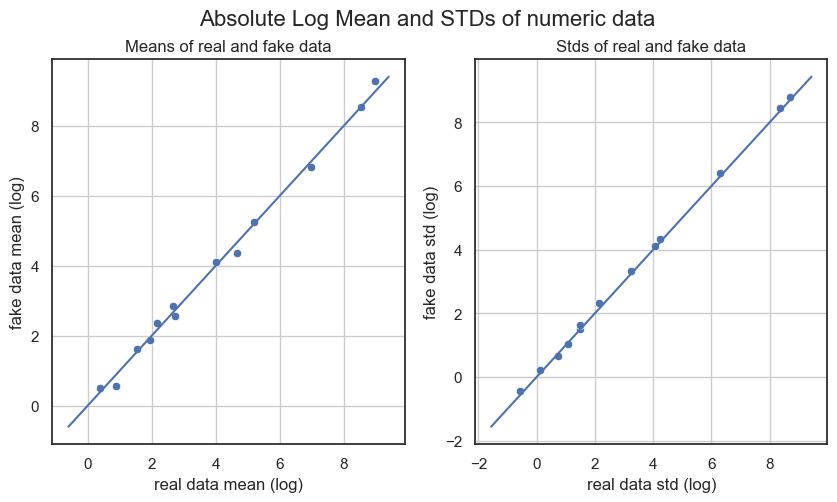

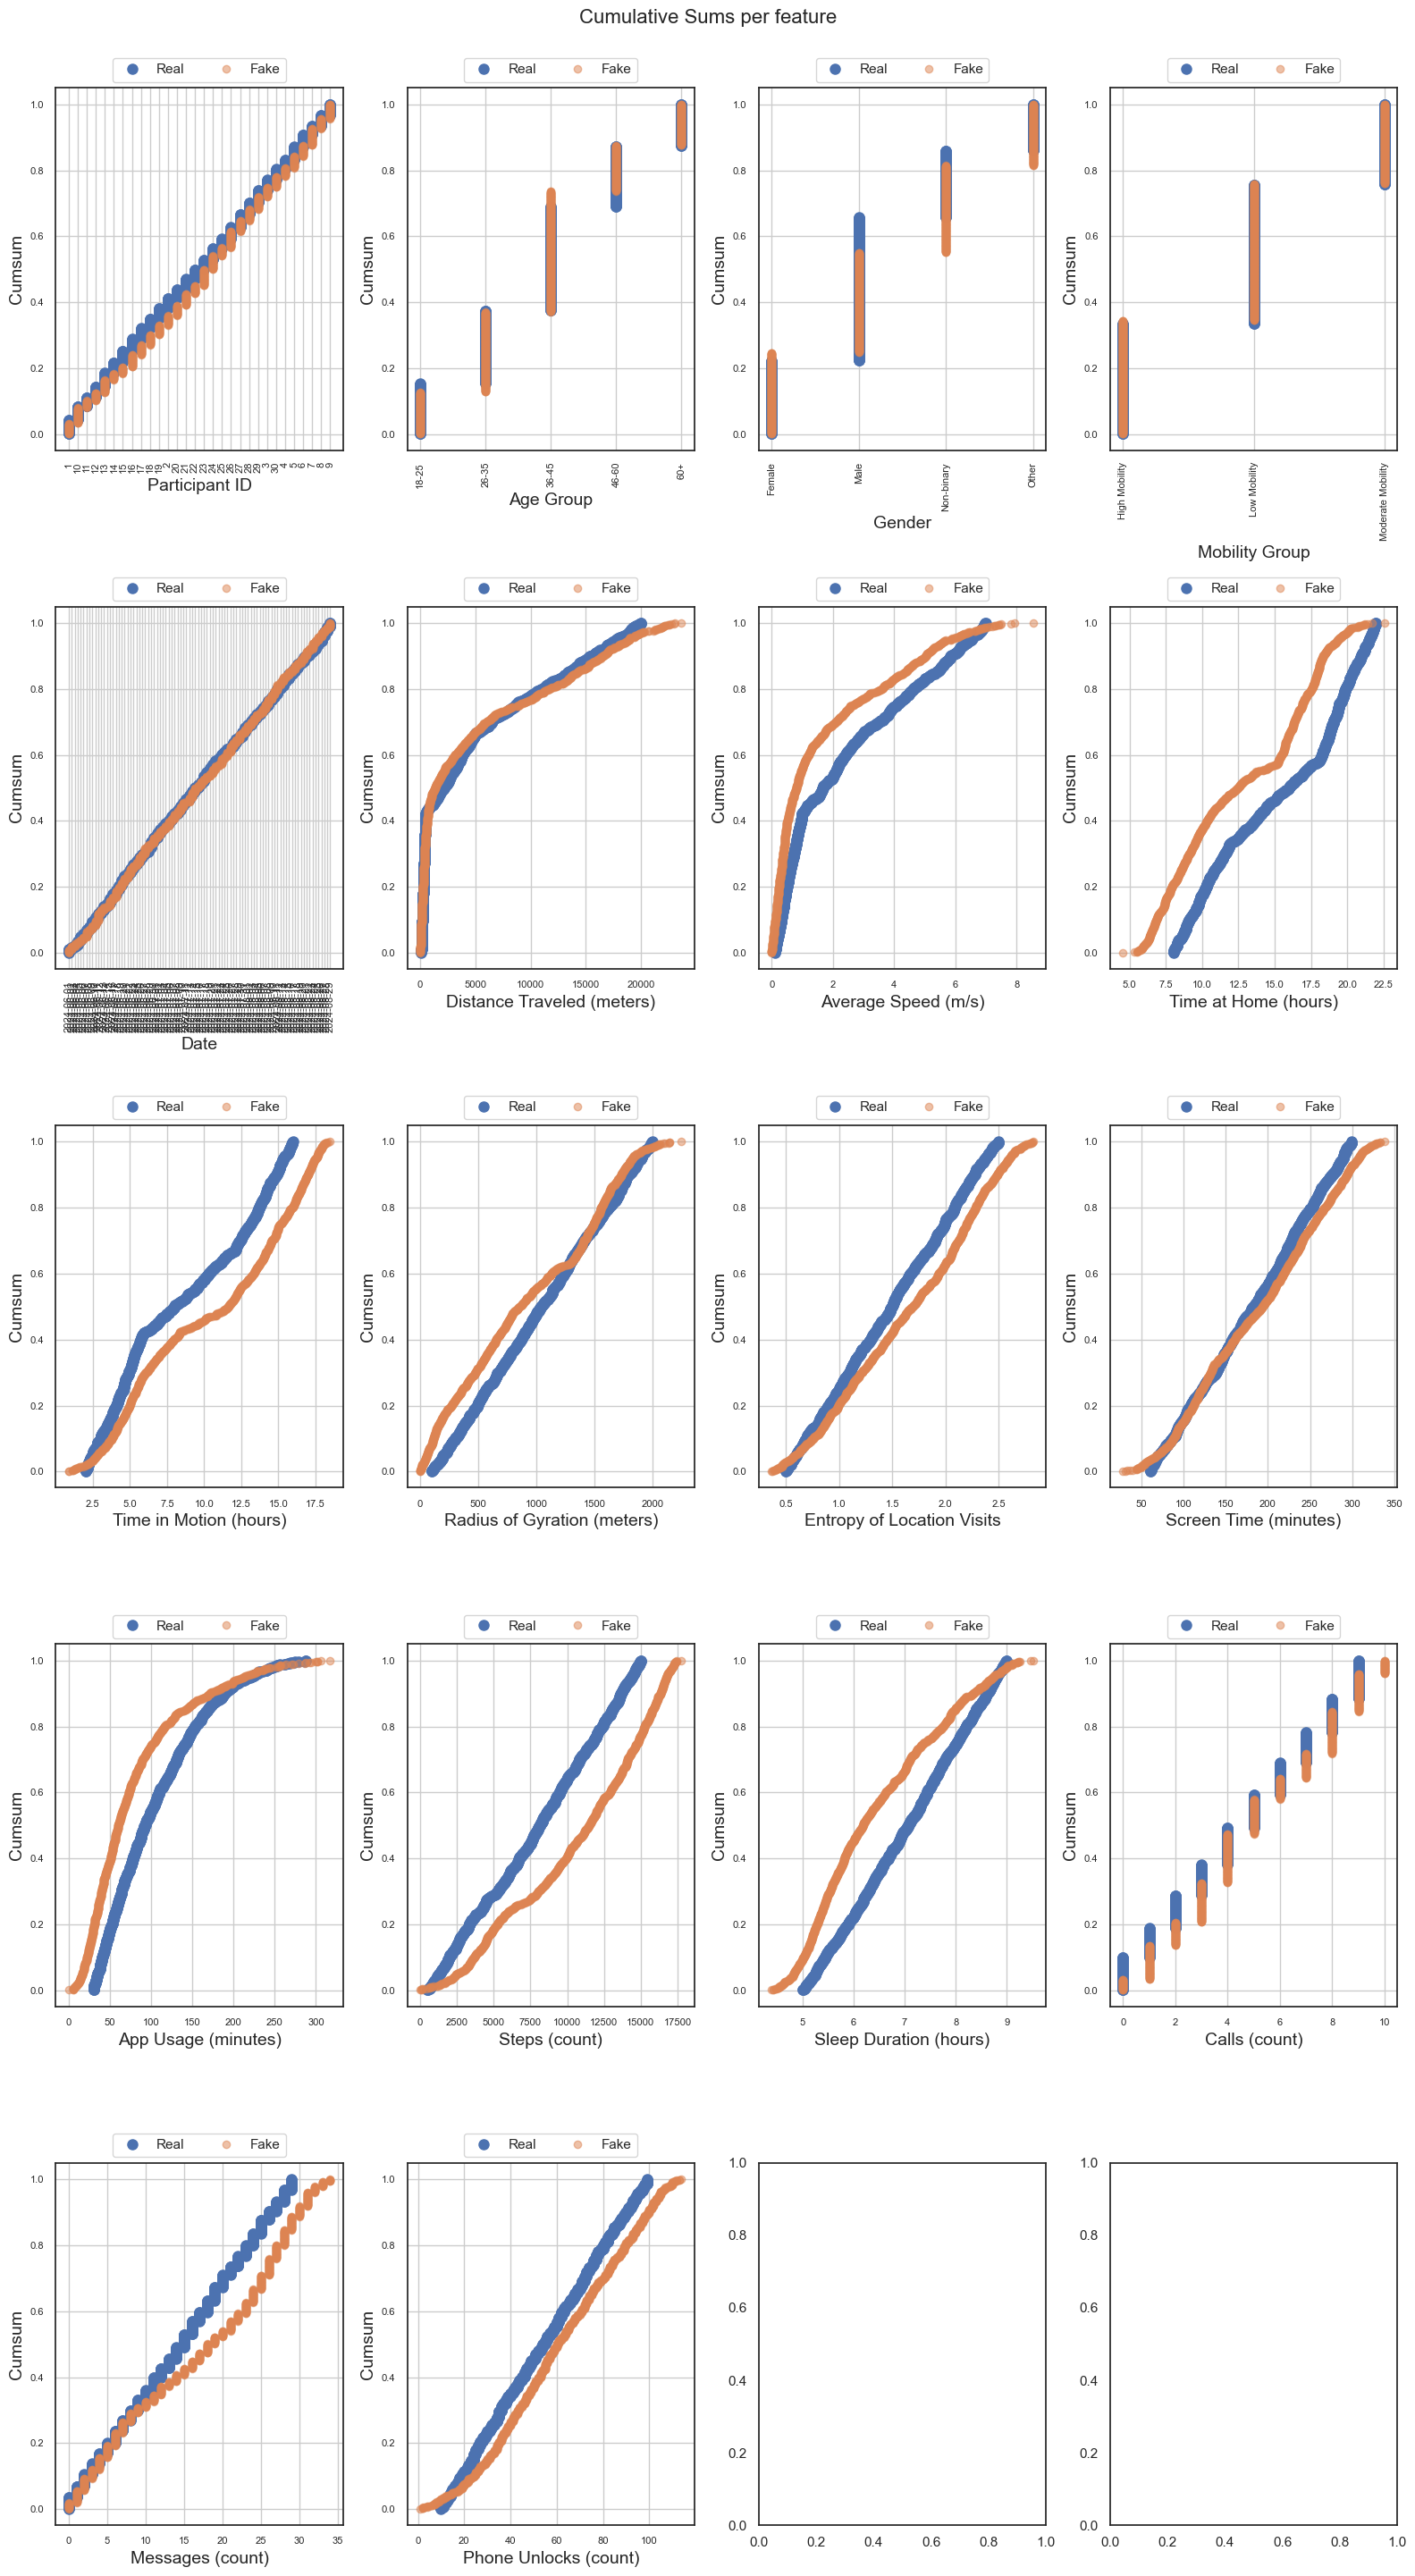

/opt/anaconda3/envs/automate/lib/python3.12/site-packages/table_evaluator/table_evaluator.py:246: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation="vertical")
/opt/anaconda3/envs/automate/lib/python3.12/site-packages/table_evaluator/table_evaluator.py:246: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation="vertical")
/opt/anaconda3/envs/automate/lib/python3.12/site-packages/table_evaluator/table_evaluator.py:246: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation="vertical")
/opt/anaconda3/envs/automate/lib/python3.12/site-packages/table_evaluator/table_evaluator.py:246: UserWarning: set_

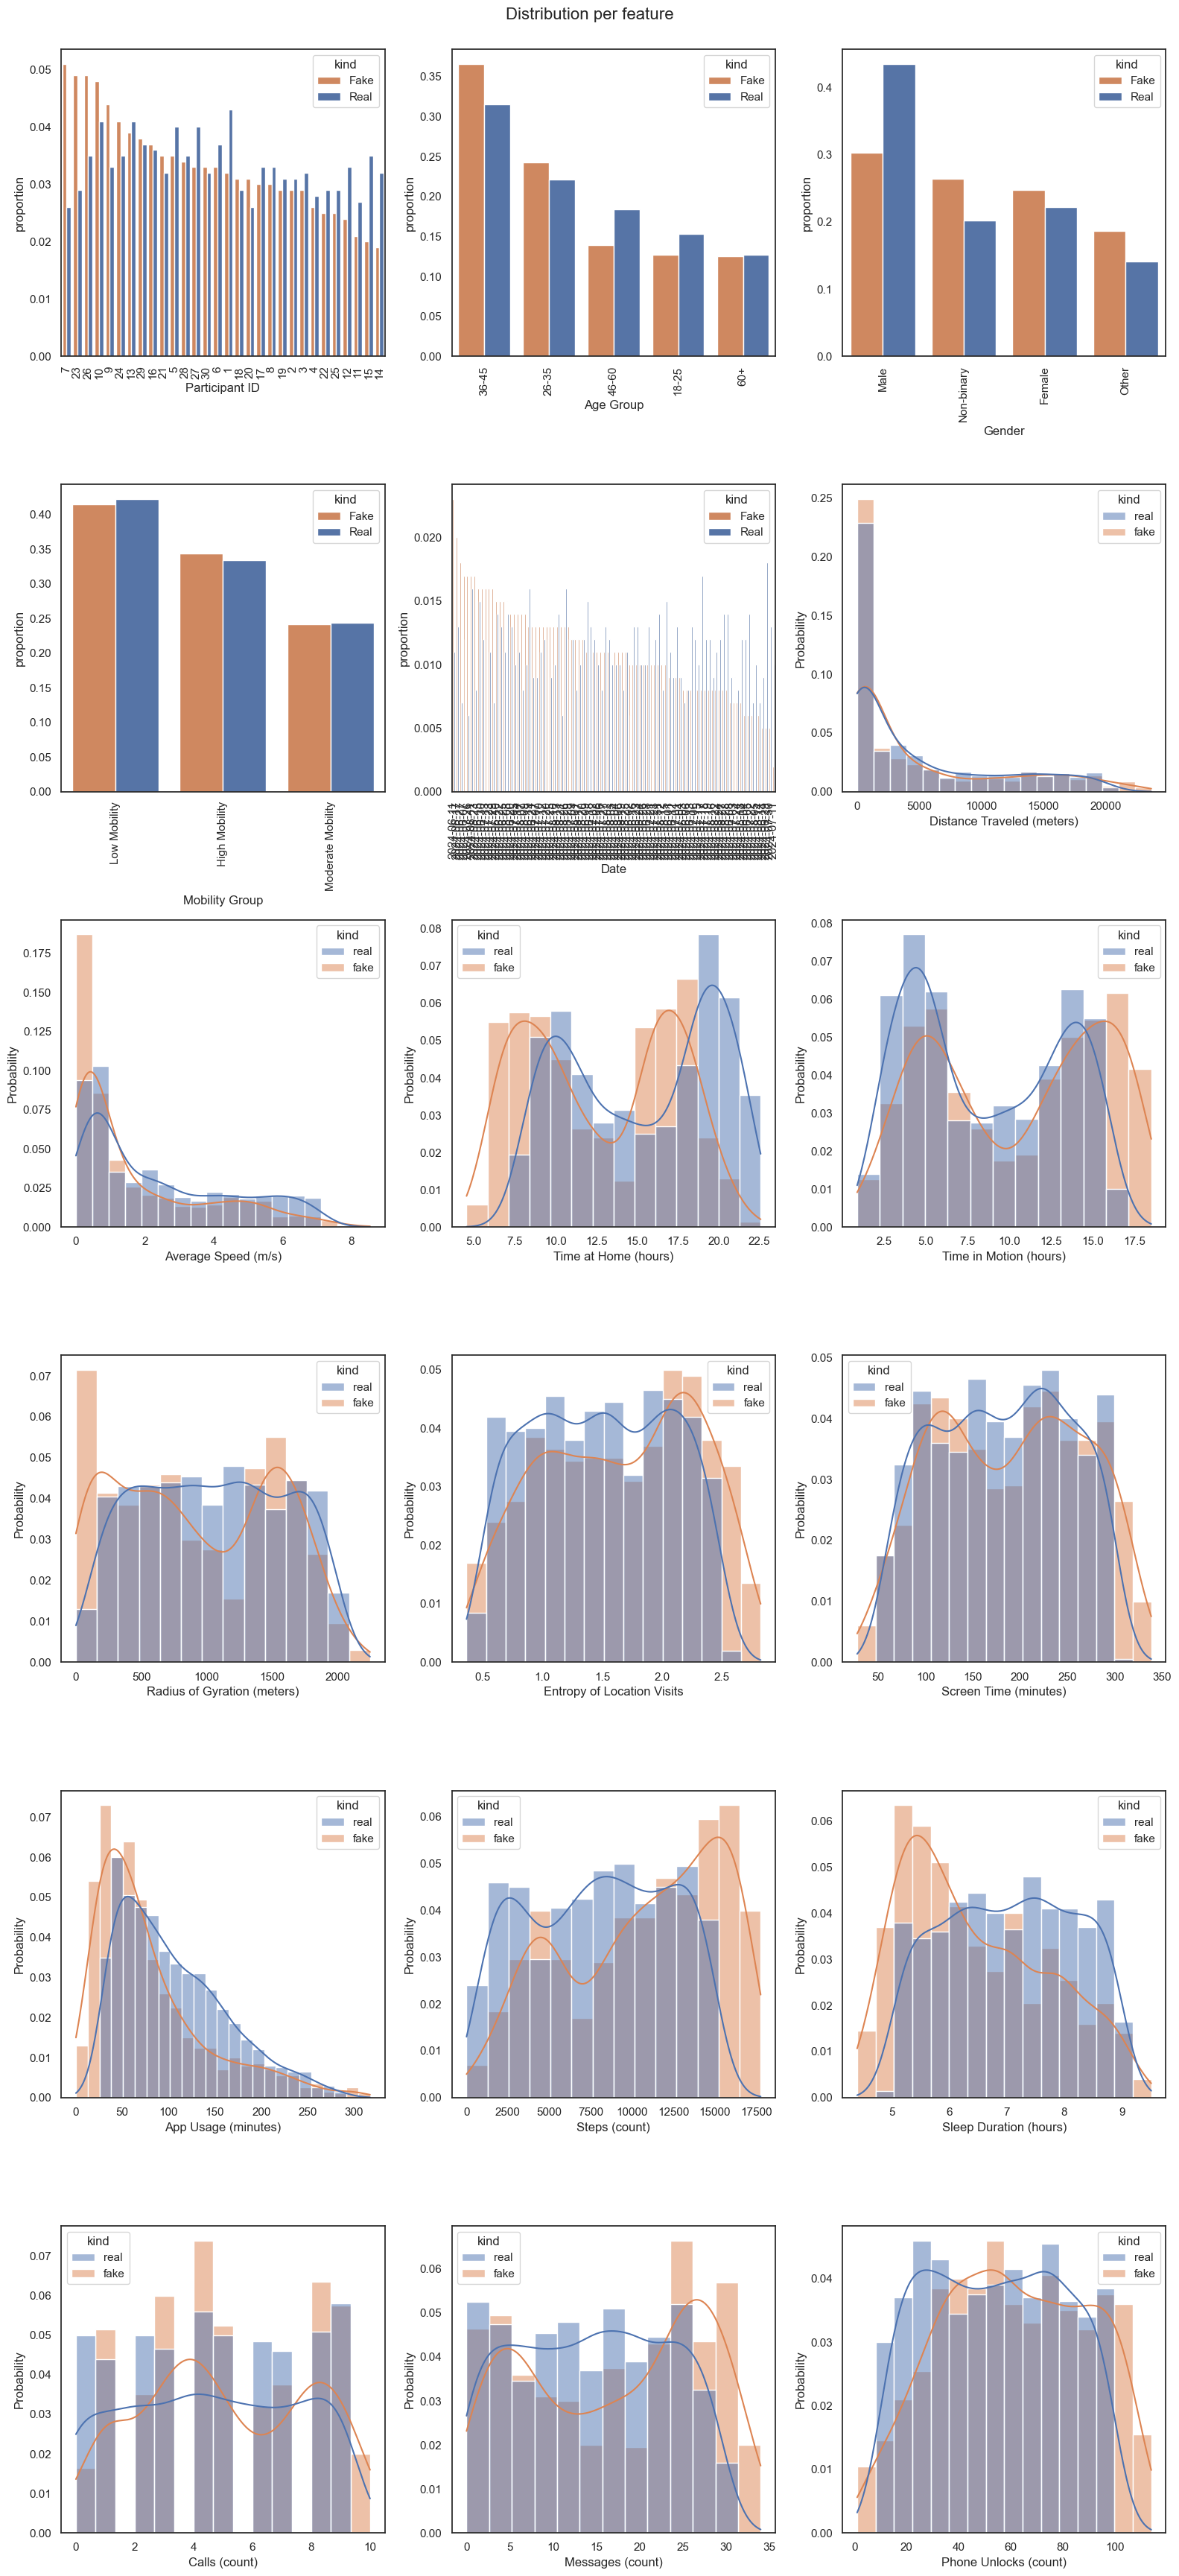

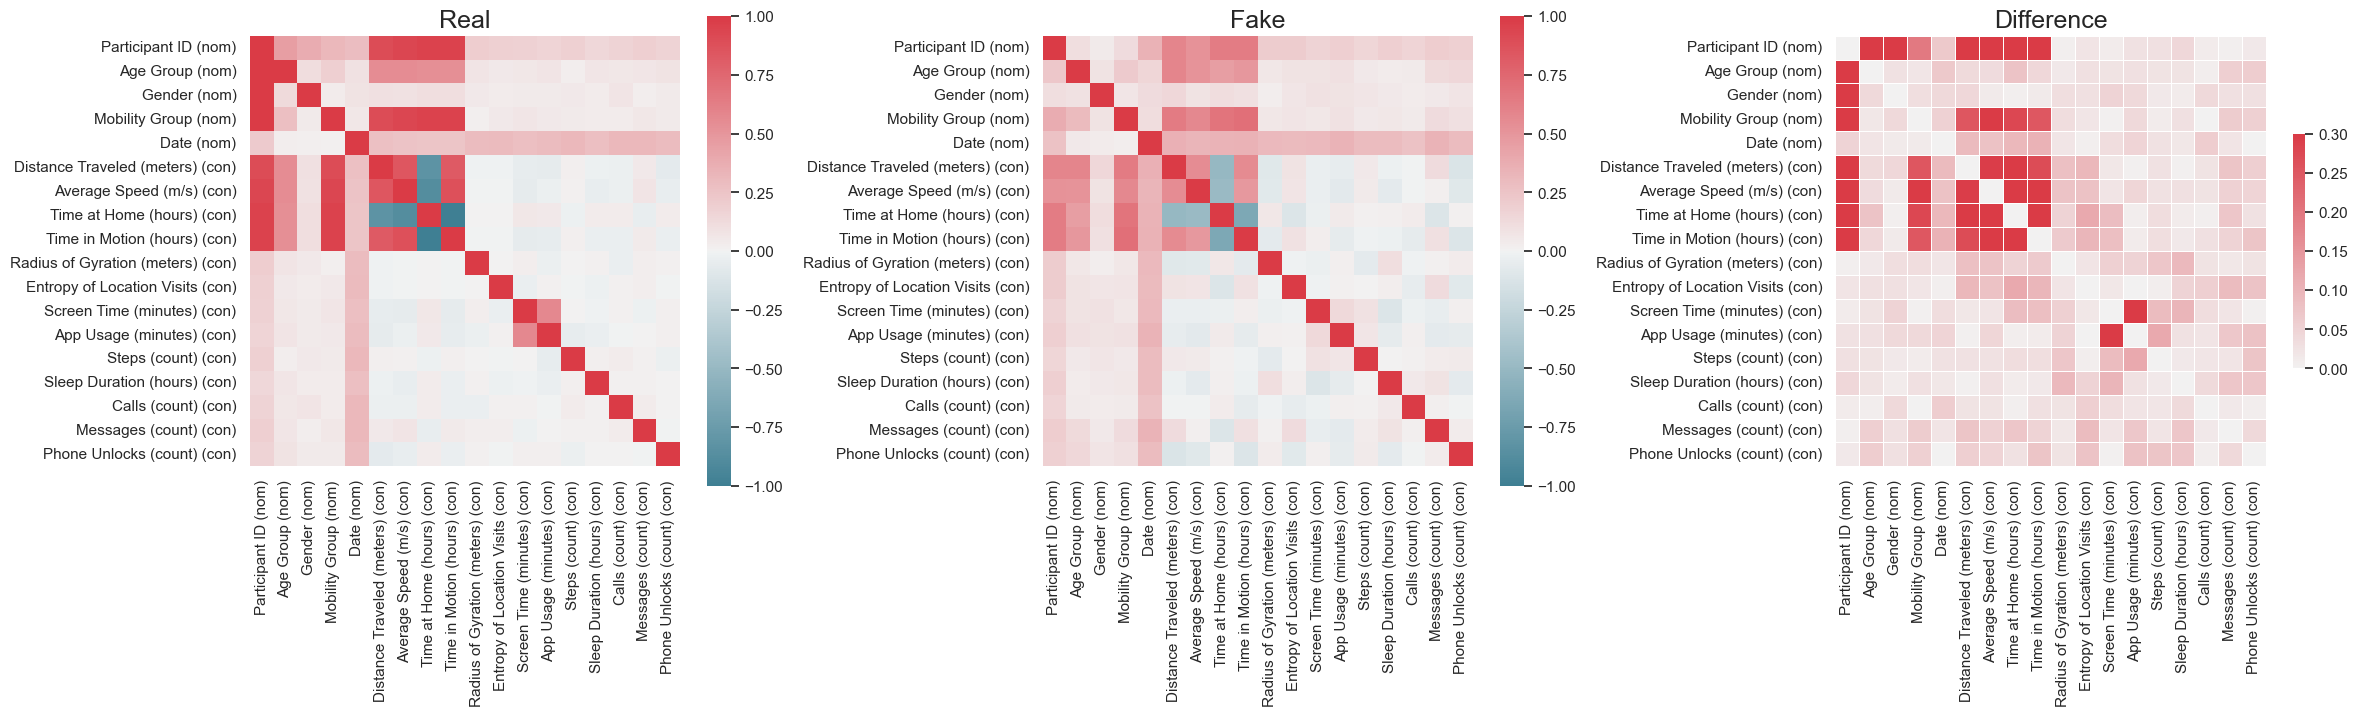

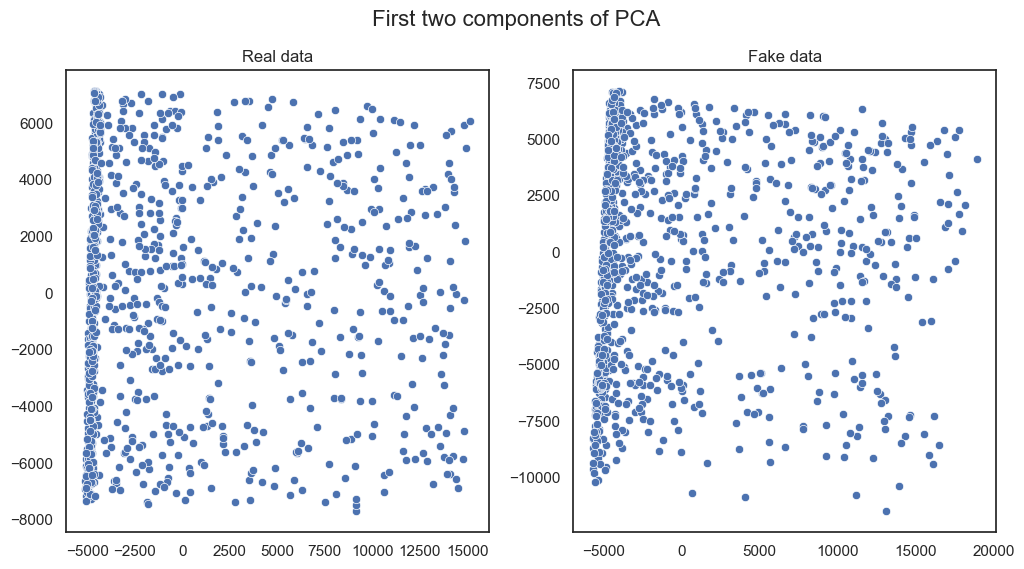

In [179]:
comparison.visual_evaluation()

In [180]:
df_synthetic.to_csv("digital_phenotyping_data_ctgan.csv",index=False)

# Using ChatGPT to generate labeling based on domain knowledge

**Domain knowledge from my publications**

**`Prompt:`** Label the data as **Depressed (1)** or **Non-Depressed (0)** using the following domain knowledge:

A significant positive Pearson correlation (r=0.14, P<.001) was found between screen status–normalized entropy and depression, and LMM results show an intraclass correlation of 0.7584 with a significant positive association (β=0.48, P=0.03). Participants who stay at the same significant location at the same time of day across multiple days (high location routine index) with high location entropy are more likely to be classified as depressed. In contrast, participants with high normalized location entropy, who visit different locations during the day, and also have a high location routine index, are more likely to be classified as non-depressed. Similarly, phone usage patterns show that frequent screen unlocks with shorter unlock durations increase the likelihood of being classified as depressed, while fewer unlocks with more screen time per unlock are associated with being non-depressed.

We found statistically significant correlations between self-reported depression symptoms and digital biomarkers collected from smartphones and wearables. Random and frequent phone interactions were positively correlated with depression, while variation in the number of visited locations (GPS data) was negatively correlated with depression symptoms. Those with elevated depression symptoms exhibited less mobility, spending more time in single-location clusters and visiting fewer places, alongside lower physical activity (fewer steps). These participants also had more total sleep time, spent more time in bed, and had difficulties staying asleep. Frequent, short phone unlocks further indicated elevated depression symptoms, suggesting difficulty concentrating and compulsively checking phones, whereas participants with fewer unlocks and longer screen time per unlock were more likely to be non-depressed.

**`Response`**

Based on the domain knowledge provided, I’ll label the data as either Depressed (1) or Non-Depressed (0) using the following key indicators:

Depressed (1):
* High Screen Unlocks with Lower Duration: Frequent short unlocks.
* High Screen Status-Normalized Entropy: Random and frequent interactions with the phone.
* Low Mobility and Location Entropy: Spending more time in single-location clusters, visiting fewer distinct locations.
* Less Physical Activity: Lower steps and time spent outside of home.
* More Sleep Time: More time in bed or difficulties staying asleep.

Non-Depressed (0):
* Lower Screen Unlocks with Higher Duration: Fewer, but longer phone interactions.
* High Location Entropy and Routine: Participants visiting diverse locations and sticking to a routine.
* Higher Mobility: Moving between different locations more frequently.
* More Physical Activity: Higher step counts.
* Less Sleep Time: More structured sleep, less total time in bed.

The code generated with the response is below

In [5]:
# Reattempt labeling logic based on the provided domain knowledge
import random
def classify_depression(row):
    # Conditions for classifying as depressed (1)
    if (row['Phone Unlocks (count)'] > 60 and row['Screen Time (minutes)'] / row['Phone Unlocks (count)'] < 2) or \
       (row['Entropy of Location Visits'] < 1.0 and row['Radius of Gyration (meters)'] < 500) or \
       (row['Steps (count)'] < 4000) or \
       (row['Sleep Duration (hours)'] > 8):
        return 1  # Depressed
    # Conditions for classifying as non-depressed (0)
    elif (row['Phone Unlocks (count)'] < 50 and row['Screen Time (minutes)'] / row['Phone Unlocks (count)'] > 2) and \
         (row['Entropy of Location Visits'] > 1.5 and row['Radius of Gyration (meters)'] > 1000) and \
         (row['Steps (count)'] > 8000) and \
         (row['Sleep Duration (hours)'] < 7):
        return 0  # Non-depressed
    # Default to non-depressed if not clearly classified
    return random.choice([0, 1])

In [6]:
import pandas as pd
df_gpt = pd.read_csv("digital_phenotyping_data_gpt.csv")

# Apply classification
df_gpt['Depressed'] = df_gpt.apply(classify_depression, axis=1)

In [10]:
df_gpt["Depressed"].value_counts()/df_gpt.shape[0]

Depressed
1    0.754074
0    0.245926
Name: count, dtype: float64

In [14]:
df_gpt.to_csv("digital_phenotyping_data_gpt_labeled.csv",index=False)